In [2]:
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np
from sklearn.metrics import roc_curve, auc, roc_auc_score
from time import time
import os
import glob
import pandas as pd
import time

/home/dnslab/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/dnslab/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:18: DeprecationWarning: Please use `line_search_wolfe2` from the `scipy.optimize` namespace, the `scipy.optimize.linesearch` namespace is deprecated.
  from scipy.optimize.linesearch import line_search_wolfe2, line_search_wolfe1
/home/dnslab/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:18: DeprecationWarning: Please use `line_search_wolfe1` from the `scipy.optimize` namespace, the `scipy.optimize.linesearch` namespace is deprecated.
  from scipy.optimize.linesearch import line_search_wolfe2, line_search_wolfe1


In [15]:
path = './'

csv_files = glob.glob(os.path.join(path, '**/*tcp_udp_payload.csv'), recursive=True)

combined_data = pd.DataFrame()

for csv in csv_files:
    print(csv)
    df = pd.read_csv(csv, header=0)
    
    combined_data = pd.concat([combined_data, df], axis = 0)
    
    
combined_data.to_csv("Datasets_tcp_udp_payload.csv", index = False)


./Angler-EK/2016-04-22-pseudo-Darkleech-Angler-EK-traffictcp_udp_payload.csv
./Angler-EK/2015-05-14-Angler-EK-delivers-ransomwaretcp_udp_payload.csv
./Angler-EK/2014-05-25-Angler-EK-traffictcp_udp_payload.csv
./Angler-EK/2015-08-24-Angler-EK-sends-TeslaCrypt-2.0-traffictcp_udp_payload.csv
./Angler-EK/2014-11-22-Angler-EK-traffictcp_udp_payload.csv
./Angler-EK/2014-11-14-Angler-EK-traffictcp_udp_payload.csv
./Angler-EK/2015-02-10-Angler-EK-traffictcp_udp_payload.csv
./Angler-EK/2014-09-26-Angler-EK-traffictcp_udp_payload.csv
./Angler-EK/2015-05-25-Angler-EK-and-ransomware-traffictcp_udp_payload.csv
./Angler-EK/2014-10-01-Angler-EK-traffictcp_udp_payload.csv
./Angler-EK/2014-11-15-Angler-EK-traffictcp_udp_payload.csv
./Angler-EK/2014-09-09-Angler-EK-traffictcp_udp_payload.csv
./Angler-EK/2014-06-20-Angler-EK-traffictcp_udp_payload.csv
./Angler-EK/2015-05-07-Angler-EK-and-ransomware-traffictcp_udp_payload.csv
./Angler-EK/2014-06-24-Angler-EK-traffictcp_udp_payload.csv
./Angler-EK/2014-09-

./Trickbot/2019-03-11_malware_mta_trickbot_0365tcp_udp_payload.csv
./Trickbot/2019-03-05_malware_mta_trickbot_0361tcp_udp_payload.csv
./Trickbot/2018-08-07_malware_mta_trickbot_0292tcp_udp_payload.csv
./Trickbot/2018-07-05_malware_mta_trickbot_0279tcp_udp_payload.csv
./Trickbot/2019-03-06_malware_mta_trickbot_0362tcp_udp_payload.csv
./Trickbot/2018-09-21_malware_mta_trickbot_0309tcp_udp_payload.csv
./Trickbot/2019-02-20_malware_mta_trickbot_0356tcp_udp_payload.csv
./Trickbot/2018-02-01_malware_mta_trickbot_0229tcp_udp_payload.csv
./Trickbot/2017-08-12_malware_mta_trickbot_0190tcp_udp_payload.csv
./Trickbot/2019-03-07_malware_mta_trickbot_0363tcp_udp_payload.csv
./Trickbot/2018-10-26_malware_mta_trickbot_0320tcp_udp_payload.csv
./Trickbot/2018-06-26_malware_mta_trickbot_0273tcp_udp_payload.csv
./Trickbot/2018-09-21_malware_mta_trickbot_0310tcp_udp_payload.csv
./Trickbot/2018-11-12_malware_mta_trickbot_0327tcp_udp_payload.csv
./Trickbot/2019-02-15_malware_mta_trickbot_0355tcp_udp_payload

In [3]:
combined_data = pd.read_csv('Datasets_tcp_udp_payload.csv', header = 0)
combined_data

,ipv4_ver_0,ipv4_ver_1,ipv4_ver_2,ipv4_ver_3,ipv4_hl_0,ipv4_hl_1,ipv4_hl_2,ipv4_hl_3,ipv4_tos_0,ipv4_tos_1,...,payload_bit_151,payload_bit_152,payload_bit_153,payload_bit_154,payload_bit_155,payload_bit_156,payload_bit_157,payload_bit_158,payload_bit_159,Class
0,0,1,0,0,0,1,0,1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,Angler-EK
1,0,1,0,0,0,1,0,1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,Angler-EK
2,0,1,0,0,0,1,0,1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,Angler-EK
3,0,1,0,0,0,1,0,1,0,0,...,1,0,1,1,0,0,1,0,1,Angler-EK
4,0,1,0,0,0,1,0,1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,Angler-EK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506443,0,1,0,0,0,1,0,1,0,0,...,0,0,1,1,1,0,0,1,0,IcedID
2506444,0,1,0,0,0,1,0,1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,IcedID
2506445,0,1,0,0,0,1,0,1,0,0,...,0,1,0,1,0,1,0,0,1,IcedID
2506446,0,1,0,0,0,1,0,1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,IcedID


In [10]:
import os

# Set the memory usage threshold to 1GB (1,073,741,824 bytes)

os.environ['RAY_memory_usage_threshold'] = str(int('1073741824'))

# Disable worker killing
os.environ['RAY_memory_monitor_refresh_ms'] = '0'


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
data1, data2 = train_test_split(combined_data, test_size=0.1, random_state=1)

In [6]:
data3 = data2.dropna()

In [7]:
data3

,ipv4_ver_0,ipv4_ver_1,ipv4_ver_2,ipv4_ver_3,ipv4_hl_0,ipv4_hl_1,ipv4_hl_2,ipv4_hl_3,ipv4_tos_0,ipv4_tos_1,...,payload_bit_151,payload_bit_152,payload_bit_153,payload_bit_154,payload_bit_155,payload_bit_156,payload_bit_157,payload_bit_158,payload_bit_159,Class
677357,0,1,0,0,0,1,0,1,0,0,...,1,1,1,1,1,0,1,0,0,Trickbot
1591070,0,1,0,0,0,1,0,1,0,0,...,1,0,1,0,1,0,0,0,1,Trickbot
2366013,0,1,0,0,0,1,0,1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,Hancitor
1760614,0,1,0,0,0,1,0,1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,Trickbot
575616,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,1,1,1,Trickbot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885703,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,1,Trickbot
2249171,0,1,0,0,0,1,0,1,0,0,...,1,0,0,1,0,0,1,1,0,Hancitor
953173,0,1,0,0,0,1,0,1,0,0,...,0,1,1,0,1,0,1,1,0,Trickbot
635836,0,1,0,0,0,1,0,1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,Trickbot


In [8]:
train_data, test_valid_data = train_test_split(data3, test_size=0.3, random_state=1)
test_data, valid_data = train_test_split(test_valid_data, test_size=0.5, random_state=1)

In [9]:
data3['Class'].unique()

array(['Trickbot', 'Hancitor', 'Gootkit', 'Angler-EK', 'Rig-EK', 'IcedID',
       'Zeus', 'Dridex'], dtype=object)

In [10]:
start = time.time()
pred = TabularPredictor(label='Class').fit(train_data = train_data, tuning_data = valid_data)
end = time.time()

No path specified. Models will be saved in: "AutogluonModels/ag-20230429_151354/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230429_151354/"
AutoGluon Version:  0.1.0
Train Data Rows:    175451
Train Data Columns: 1120
Tuning Data Rows:    37597
Tuning Data Columns: 1120
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == object).
	8 unique label values:  ['Trickbot', 'Zeus', 'Rig-EK', 'Gootkit', 'Hancitor', 'IcedID', 'Dridex', 'Angler-EK']
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 8
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    64640.94 MB
	Train Data (Original)  Memory Usage: 1908.91 MB (3.0% of available memory)
	Inferring dat

Fitting model: NeuralNetMXNet ...
/home/dnslab/.local/lib/python3.8/site-packages/mxnet/ndarray/utils.py:141: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  if spsp is not None and isinstance(source_array, spsp.csr.csr_matrix):
/home/dnslab/.local/lib/python3.8/site-packages/mxnet/ndarray/utils.py:141: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  if spsp is not None and isinstance(source_array, spsp.csr.csr_matrix):
/home/dnslab/.local/lib/python3.8/site-packages/mxnet/ndarray/utils.py:141: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  if spsp is not None and isinstance(source_array, spsp.csr.csr_matrix):
	0.9975	 = Validation accuracy score
	423.57s	 = Training runtime
	7.12s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
		Import

In [20]:
predictions = pred.predict(test_data)
score = pred.evaluate(test_data)

/home/dnslab/.local/lib/python3.8/site-packages/mxnet/ndarray/utils.py:141: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  if spsp is not None and isinstance(source_array, spsp.csr.csr_matrix):
/home/dnslab/.local/lib/python3.8/site-packages/mxnet/ndarray/utils.py:141: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  if spsp is not None and isinstance(source_array, spsp.csr.csr_matrix):


Predictive performance on given data: accuracy = 0.9990956725270633


In [12]:
y_true = pd.Series(test_data['Class'].values)
type(y_true)

pandas.core.series.Series

In [21]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

In [28]:
ac = accuracy_score(y_true, predictions)
recall = recall_score(y_true, predictions, average='weighted')
f1 = f1_score(y_true, predictions, average='weighted')
print(ac, recall, f1)

0.9990956725270633 0.9990956725270633 0.9990952172186309


In [22]:
f1 = pred.evaluate_predictions(y_true=y_true, y_pred=predictions, auxiliary_metrics=True)
accuracy = pred.evaluate_predictions(y_true=y_true, y_pred=predictions, auxiliary_metrics=True)
recall = pred.evaluate_predictions(y_true=y_true, y_pred=predictions, auxiliary_metrics=True)
precision = pred.evaluate_predictions(y_true=y_true, y_pred=predictions, auxiliary_metrics=True)
'''
print("F1 score:", f1)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
'''
score.keys()

Evaluation: accuracy on test data: 0.9990956725270633
Evaluations on test data:
{
    "accuracy": 0.9990956725270633,
    "accuracy_score": 0.9990956725270633,
    "balanced_accuracy_score": 0.996423230031322,
    "matthews_corrcoef": 0.9984614849322508
}
Detailed (per-class) classification report:
{
    "Angler-EK": {
        "precision": 1.0,
        "recall": 0.9956140350877193,
        "f1-score": 0.9978021978021978,
        "support": 684
    },
    "Dridex": {
        "precision": 1.0,
        "recall": 0.9897435897435898,
        "f1-score": 0.9948453608247423,
        "support": 390
    },
    "Gootkit": {
        "precision": 1.0,
        "recall": 0.9991220368744512,
        "f1-score": 0.999560825647782,
        "support": 3417
    },
    "Hancitor": {
        "precision": 0.9974799881411207,
        "recall": 0.9991091314031181,
        "f1-score": 0.9982938951116387,
        "support": 6735
    },
    "IcedID": {
        "precision": 1.0,
        "recall": 0.99485861182519

AttributeError: 'numpy.float64' object has no attribute 'keys'

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:

def cmp(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('test_tcp_ipv4_payload.png', dpi=300, bbox_inches='tight')


Normalized confusion matrix


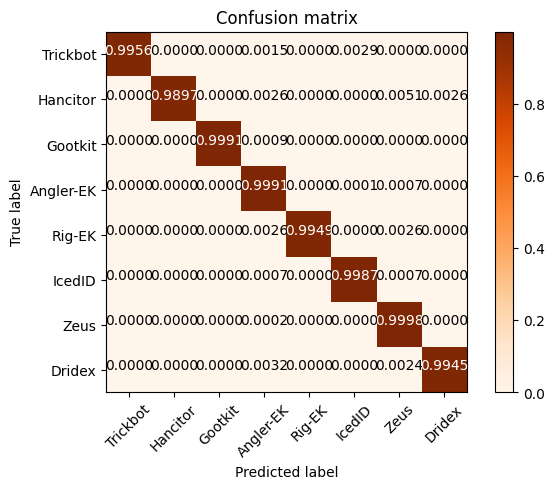

In [15]:
cmp(confusion_matrix(y_true, predictions), ['Trickbot', 'Hancitor', 'Gootkit', 'Angler-EK', 'Rig-EK', 'IcedID',
       'Zeus', 'Dridex'], normalize=True, cmap=plt.cm.Oranges)

In [11]:
import ray
ray.shutdown()
ray.init()
@ray.remote
def ML(train, test, valid):
    start = time.time()
    predictor = TabularPredictor(label='Class').fit(train_data=train, tuning_data = valid)
    end = time.time()
    
res = ML.remote(train_data, test_data, valid_data)
r = ray.get(res)
ray.shutdown()


    

Exception: The current node has not been updated within 30 seconds, this could happen because of some of the Ray processes failed to startup.

In [6]:
res

ObjectRef(c8ef45ccd0112571ffffffffffffffffffffffff0100000001000000)

(raylet) [2023-04-28 03:15:58,640 E 4806 4806] (raylet) node_manager.cc:3040: 1 Workers (tasks / actors) killed due to memory pressure (OOM), 0 Workers crashed due to other reasons at node (ID: d23320fe2f6c975c625bb00aeddf0e6f5d10b0792d5e3a7b5b952c0d, IP: 192.168.245.105) over the last time period. To see more information about the Workers killed on this node, use `ray logs raylet.out -ip 192.168.245.105`
(raylet) 
(raylet) Refer to the documentation on how to address the out of memory issue: https://docs.ray.io/en/latest/ray-core/scheduling/ray-oom-prevention.html. Consider provisioning more memory on this node or reducing task parallelism by requesting more CPUs per task. To adjust the kill threshold, set the environment variable `RAY_memory_usage_threshold` when starting Ray. To disable worker killing, set the environment variable `RAY_memory_monitor_refresh_ms` to zero.


In [ ]:
ge